# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
#from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import missingno as msno
import scipy.stats as st
from collections import Counter
from sklearn.preprocessing import PowerTransformer
from scipy.stats import norm,probplot
%matplotlib inline
sns.set
pd.options.display.max_columns = 90



# 2. Data Loading

In [2]:
train=pd.read_csv('/Users/huitingsheng/Downloads/Github/Predict-House-Sale-Price/train.csv')
test=pd.read_csv('/Users/huitingsheng/Downloads/Github/Predict-House-Sale-Price/test.csv')
train_data = train.copy()
test_data = test.copy()


In [3]:
test_data.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [4]:
print(train_data.shape)
print(test_data.shape)


(1460, 81)
(1459, 80)


Test dataset has 1 feature less than train dataset. The missing feature is SalePrice which is what we try to predict. 


In [6]:
train_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
train_data.describe(include="all")



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

# 3.Target variable: Sales Price Analysis
First, let us take a look at the target variable, as it is the one we want to understand and predict

The skewness is: 1.882876
The kurtosis is: 6.536282


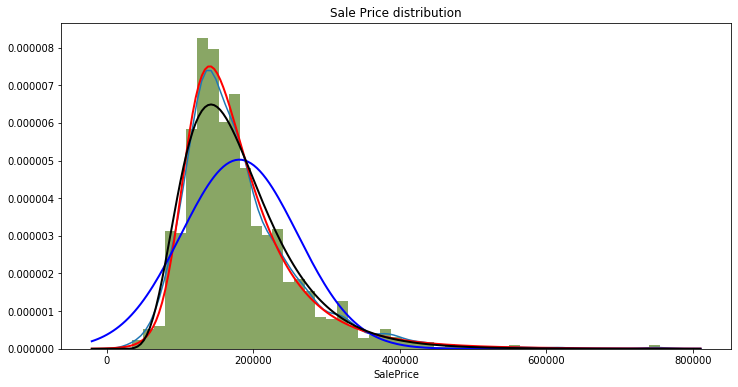

In [9]:
plt.figure(figsize=(12, 6))
#sns.distplot(train_data["SalePrice"], fit = st.norm)
plt.figure(1); plt.title('Sale Price distribution')
sns.distplot(train_data["SalePrice"], kde=True, fit=st.johnsonsu, fit_kws={"color":"red","lw": 2, "label": "johnsonsu"}, label="johnsonsu")
sns.distplot(train_data["SalePrice"], kde=False, fit=st.norm, fit_kws={"color":"blue","lw": 2, "label": "norm"})
sns.distplot(train_data["SalePrice"], kde=False, fit=st.lognorm, fit_kws={"color": "black", "lw": 2, "label": "log normal"})
# skewness of sale price
#ax.legend(handles=ax.lines[::len(df1)+1], labels=["A","B","C"])
print("The skewness is: %f" % train_data["SalePrice"].skew())
print("The kurtosis is: %f" % train_data["SalePrice"].kurtosis())


It is apparent that SalePrice doesn't follow normal distribution, so before performing regression it has to be transformed. While log transformation does pretty good job, best fit is unbounded Johnson distribution.

# 4. Check NA data



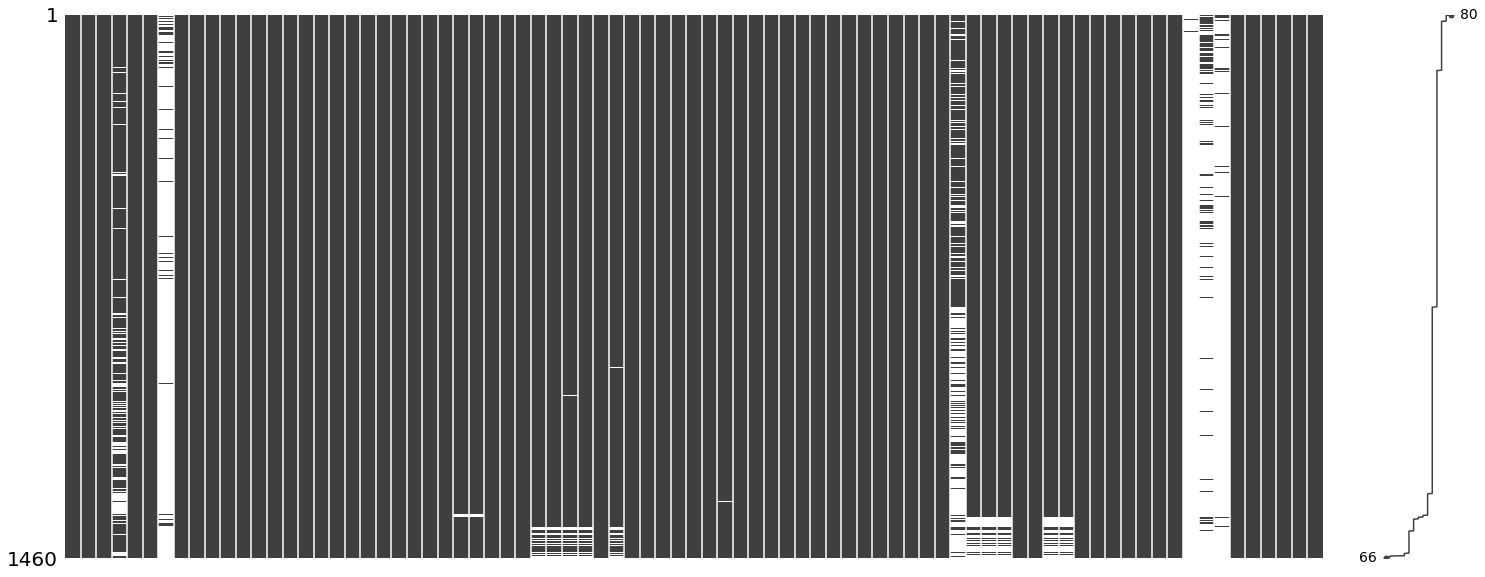

In [10]:
import missingno as msno
#visualising missing values
msno.matrix(train_data, sort='descending')

In [11]:
# Train missing data
train_missing_percent = (train_data.isnull().sum()/train_data.shape[0]).sort_values(ascending=False)
train_total_missing = train_data.isnull().sum().sort_values(ascending = False)

train_missing= pd.concat([train_total_missing, train_missing_percent], axis =1, keys =["Counts", "Missing Percent"])
train_missing[train_missing["Missing Percent"]>0]



,Counts,Missing Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


drop down features that missing more than 45%.  
replace missing LotFrontage using the median value of LotFrontage.   
GarageYrBlt has N/A value, means house has no garage. replace the missing record with 0.   
MasVnrArea has N/A value, means house has no  Masonry veneer. replace the missing record with 0.  
Electrical cannot be N/A, so remove the record.    
other features with N/A does not mean missing data, it just don't have the feature, so replace it with None.   


In [12]:
# drop features with more than 30% missing dta
drop_columns=train_missing.index[train_missing["Missing Percent"]>0.3]
train_data = train_data.drop(drop_columns, axis = 1, inplace=False)

# fill missing LotFrontage with the average LotFrontage
train_data["LotFrontage"].fillna(round(train_data["LotFrontage"].mean(),1),inplace=True)


# fill missing GarageYrBlt and MasVnrArea 0
#GrageYrBlt_na_index = train_data.index[test_data["GarageYrBlt"].isnull()]
#test_data.loc[GrageYrBlt_na_index,"GarageYrBlt"] = test_data.loc[GrageYrBlt_na_index,"YearBuilt"]
train_data["GarageYrBlt"].fillna(0,inplace=True)
train_data["MasVnrArea"].fillna(0,inplace=True)

# remove the record with mising Electrical from train
electrical_na_index = train_data.index[train_data["Electrical"].isnull()]
train_data = train_data.drop(electrical_na_index)

#columns where NaN is a value
missing_features= train_missing[(train_missing["Missing Percent"]>0) & (train_missing["Missing Percent"]<=0.3)].index

for col in missing_features:
    train_data[col].fillna('None',inplace=True)
    




Do the same thing the test data

In [13]:
# Test missing data
test_missing_percent = (test_data.isnull().sum()/test_data.shape[0]).sort_values(ascending=False)
test_total_missing = test_data.isnull().sum().sort_values(ascending = False)

test_missing= pd.concat([test_total_missing, test_missing_percent], axis =1, keys =["Counts", "Missing Percent"])
test_missing[test_missing["Missing Percent"]>0]

,Counts,Missing Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


drop down features that missing more than 45%.  
replace missing LotFrontage using the median value of LotFrontage.   
GarageYrBlt has N/A value, means house has no garage. replace the missing record with 0.   
MasVnrArea has N/A value, means house has no  Masonry veneer. replace the missing record with 0.  
features with only missing 1 or 2 records can just be deleted missing record.     
other features with N/A does not mean missing data, it just don't have the feature, so replace it with None.   



In [14]:
# drop features with more than 30% missing data
drop_columns=test_missing.index[test_missing["Missing Percent"]>0.3]
test_data = test_data.drop(drop_columns, axis = 1, inplace=False)

# fill missing LotFrontage with the average LotFrontage
test_data["LotFrontage"].fillna(round(test_data["LotFrontage"].mean(),1),inplace=True)


# fill missing GarageYrBlt and MasVnrArea 0
#GrageYrBlt_na_index = train_data.index[test_data["GarageYrBlt"].isnull()]
#test_data.loc[GrageYrBlt_na_index,"GarageYrBlt"] = test_data.loc[GrageYrBlt_na_index,"YearBuilt"]
test_data["GarageYrBlt"].fillna(0,inplace=True)
test_data["MasVnrArea"].fillna(0,inplace=True)

# remove the record with mising Electrical from train

columns = test_missing.index[(test_missing["Counts"] <= 4)&(test_missing["Counts"] > 0)]
test_data =test_data.dropna( subset=columns)

#columns where NaN is a value
missing_features= test_missing[(test_missing["Missing Percent"]>0.01) & (test_missing["Missing Percent"]<=0.3)].index

for col in missing_features:
    test_data[col].fillna('None',inplace=True)

# 5 EDA, Data transformation and Engineering

## Numerical features

In [15]:
train_df = train_data.copy()
test_df = test_data.copy()
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


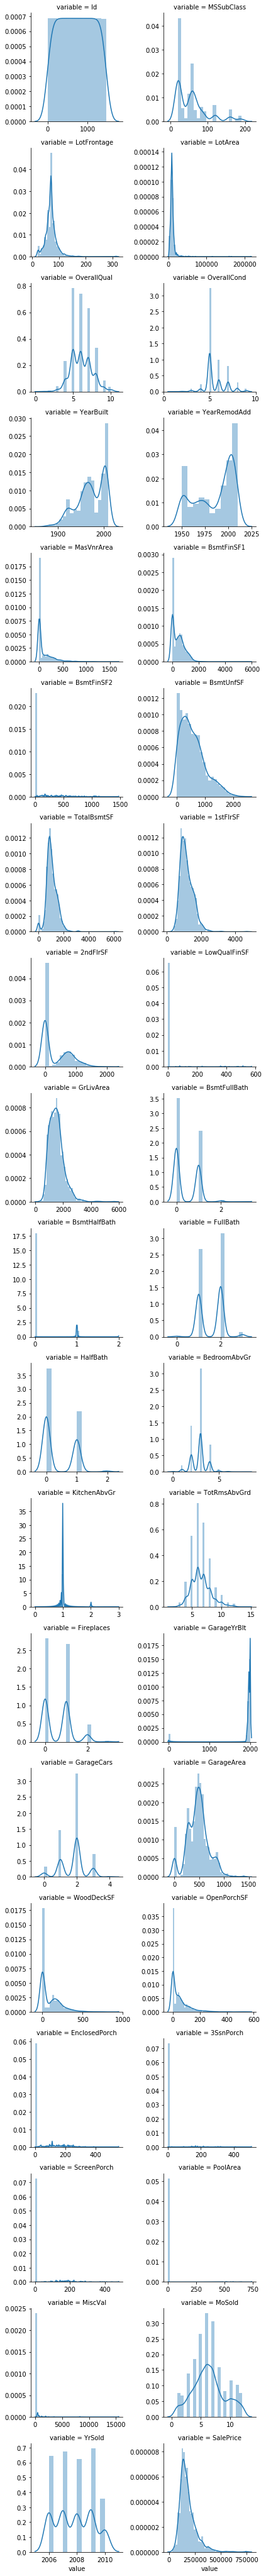

In [16]:
f = pd.melt(train_df, value_vars = train_df.select_dtypes(["float64","int64"]))
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g.map(sns.distplot, "value")

In [17]:
#train_df.select_dtypes(["int64","float64"]).kurtosis()
train_df.select_dtypes(["int64","float64"]).skew()
#train_numeric_columns = ["MasVnrArea","TotalBsmtSF","GrLivArea","SalePrice"]

Id                0.000659
MSSubClass        1.408620
LotFrontage       2.385660
LotArea          12.203431
OverallQual       0.215719
OverallCond       0.692052
YearBuilt        -0.612763
YearRemodAdd     -0.502625
MasVnrArea        2.676551
BsmtFinSF1        1.685198
BsmtFinSF2        4.253594
BsmtUnfSF         0.919312
TotalBsmtSF       1.526760
1stFlrSF          1.376504
2ndFlrSF          0.814303
LowQualFinSF      9.008149
GrLivArea         1.365701
BsmtFullBath      0.594966
BsmtHalfBath      4.101759
FullBath          0.037860
HalfBath          0.677972
BedroomAbvGr      0.212058
KitchenAbvGr      4.486640
TotRmsAbvGrd      0.676764
Fireplaces        0.648580
GarageYrBlt      -3.867940
GarageCars       -0.341845
GarageArea        0.179266
WoodDeckSF        1.540947
OpenPorchSF       2.363530
EnclosedPorch     3.088518
3SsnPorch        10.300725
ScreenPorch       4.120572
PoolArea         14.823236
MiscVal          24.468441
MoSold            0.211106
YrSold            0.096521
S

In [19]:
def data_transformation(df):
    ranking_columns = ["ExterQual","ExterCond","BsmtQual","BsmtCond","HeatingQC","KitchenQual",
                       "GarageQual","GarageCond"]
    for i in ranking_columns:
        df[i] = df[i].map({"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})
        
    # create new columns that better capture the information and drop the original column
    df["HouseAge"] = df['YrSold'] - df['YearBuilt']
    df["years_since_remod"]= df['YrSold'] - df['YearRemodAdd']
    df["MSSubClass"] =  df["MSSubClass"].astype(object)
    df["Porch"] = df["OpenPorchSF"]+df["EnclosedPorch"] + df["3SsnPorch"] + df["ScreenPorch"]
    df["Pool"] = df["PoolArea"].apply(lambda x: 1 if x > 0 else 0)
    df["MiscVal"] = df["MiscVal"].apply(lambda x: 1 if x > 0 else 0)
    colnames = ["BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch",
                "PoolArea","YrSold","YearBuilt","YearRemodAdd","1stFlrSF","2ndFlrSF","LowQualFinSF"]
    df = df.drop(colnames, axis=1, inplace=False)
    return df



In [20]:
train_df = data_transformation(train_df)
test_df = data_transformation(test_df)


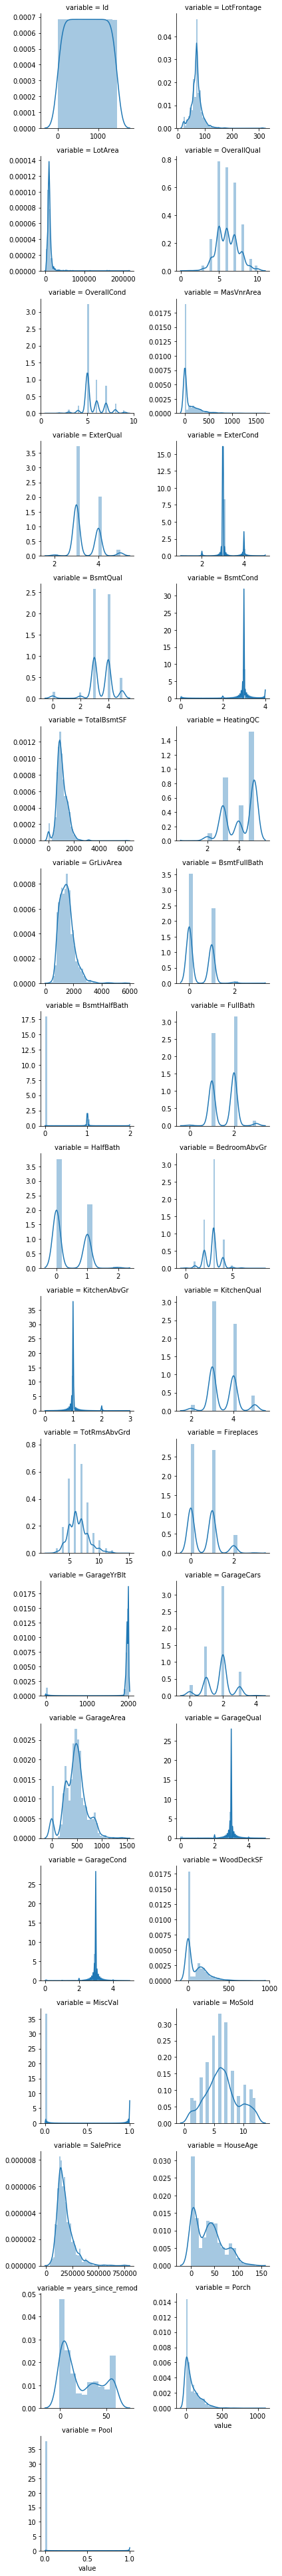

In [21]:
f = pd.melt(train_df, value_vars = train_df.select_dtypes(["float64","int64"]))
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g.map(sns.distplot, "value")

some of the features need transformation

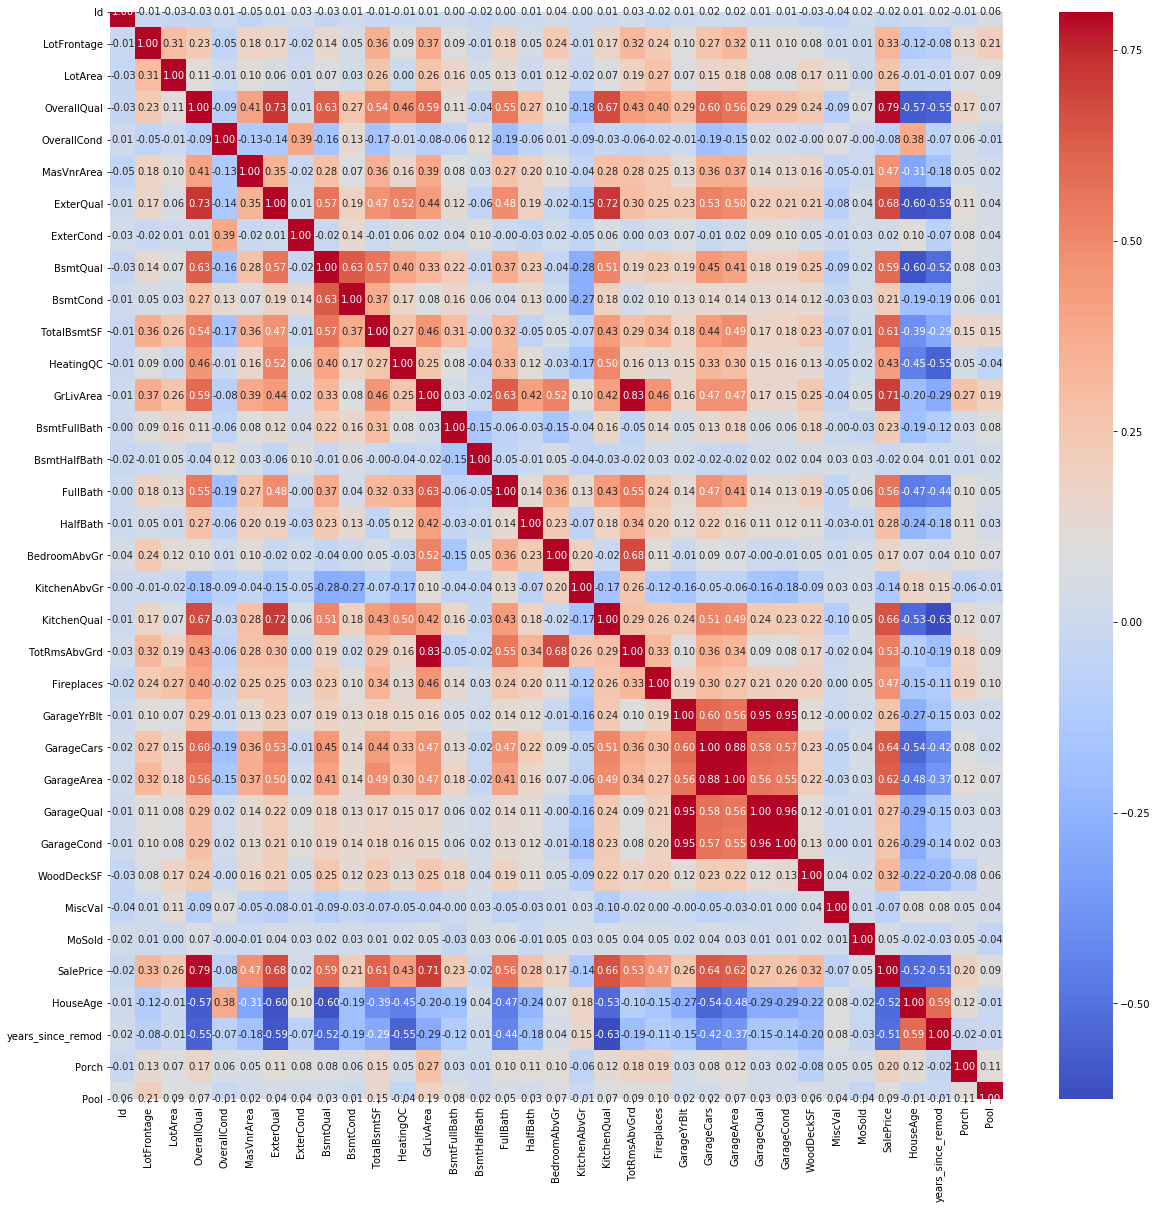

In [22]:
# check the corration of all numeric features
plt.subplots(figsize=(20, 20))
corrmat = train_df.corr()
#corrmat
sns.heatmap(corrmat,vmax =0.8, annot=True,fmt =".2f", cmap="coolwarm")


Index(['OverallQual', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'TotalBsmtSF',
       'HeatingQC', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'SalePrice', 'HouseAge',
       'years_since_remod'],
      dtype='object')


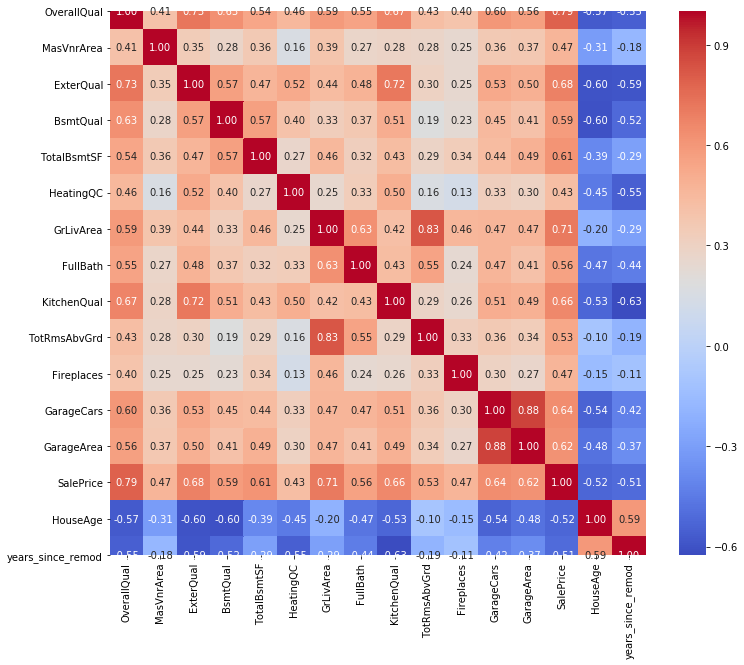

In [23]:
#most corr features to sale price
most_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.4]

plt.figure(figsize=(12,10))
sns.heatmap(train_df[most_corr_features].corr(), annot= True, fmt=".2f", cmap="coolwarm")
print(most_corr_features)



In [24]:
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
cor = abs(train_df[most_corr_features].corr())
#corr_matrix = df.corr().abs()
upper=cor.where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))
print(upper)
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop

                   OverallQual  MasVnrArea  ExterQual  BsmtQual  TotalBsmtSF  \
OverallQual                NaN    0.407075   0.726178  0.629907     0.537523   
MasVnrArea                 NaN         NaN   0.345154  0.277781     0.359798   
ExterQual                  NaN         NaN        NaN  0.565992     0.470311   
BsmtQual                   NaN         NaN        NaN       NaN     0.565435   
TotalBsmtSF                NaN         NaN        NaN       NaN          NaN   
HeatingQC                  NaN         NaN        NaN       NaN          NaN   
GrLivArea                  NaN         NaN        NaN       NaN          NaN   
FullBath                   NaN         NaN        NaN       NaN          NaN   
KitchenQual                NaN         NaN        NaN       NaN          NaN   
TotRmsAbvGrd               NaN         NaN        NaN       NaN          NaN   
Fireplaces                 NaN         NaN        NaN       NaN          NaN   
GarageCars                 NaN         N

['ExterQual', 'KitchenQual', 'TotRmsAbvGrd', 'GarageArea', 'SalePrice']

In [25]:
def high_multicollinear_features(df, threshold =0.7):
    high_corr_data = train_df[most_corr_features]
    high_corr_data = high_corr_data.loc[:,high_corr_data.columns != "SalePrice"]
    r = high_corr_data.corr()
    idx = np.abs(np.tril(r, k= -1)) < threshold
    idx_keep = np.all(idx, axis=1)
    data_uncorr = high_corr_data.iloc[:,idx_keep]
    dropped_columns=high_corr_data.columns.difference(high_corr_data.columns[idx_keep])
    plt.figure(figsize=(12,10))
    sns.heatmap(data_uncorr.corr(), annot= True, fmt=".2f", cmap="coolwarm")
    return dropped_columns

Index(['ExterQual', 'GarageArea', 'KitchenQual', 'TotRmsAbvGrd'], dtype='object')


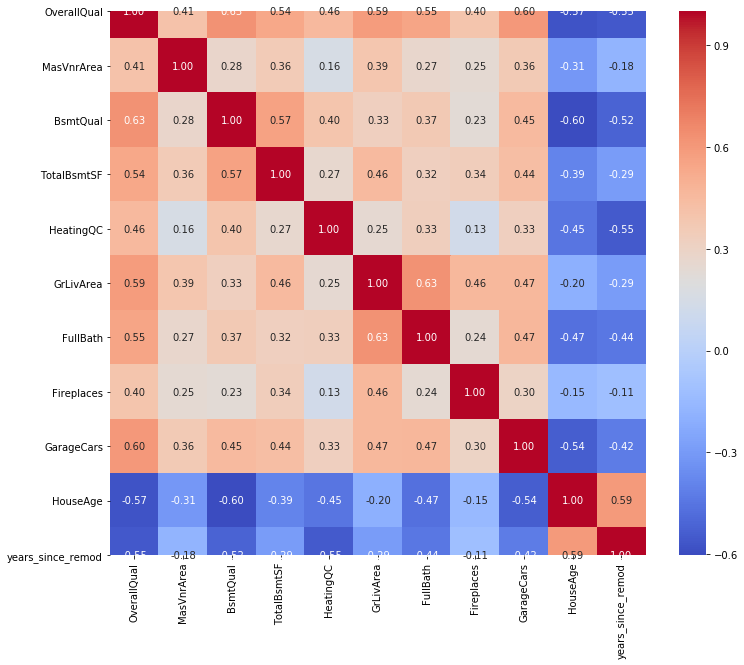

In [26]:
high_multicollinear_columns = high_multicollinear_features(train_df,threshold =0.7 )
print(high_multicollinear_columns)

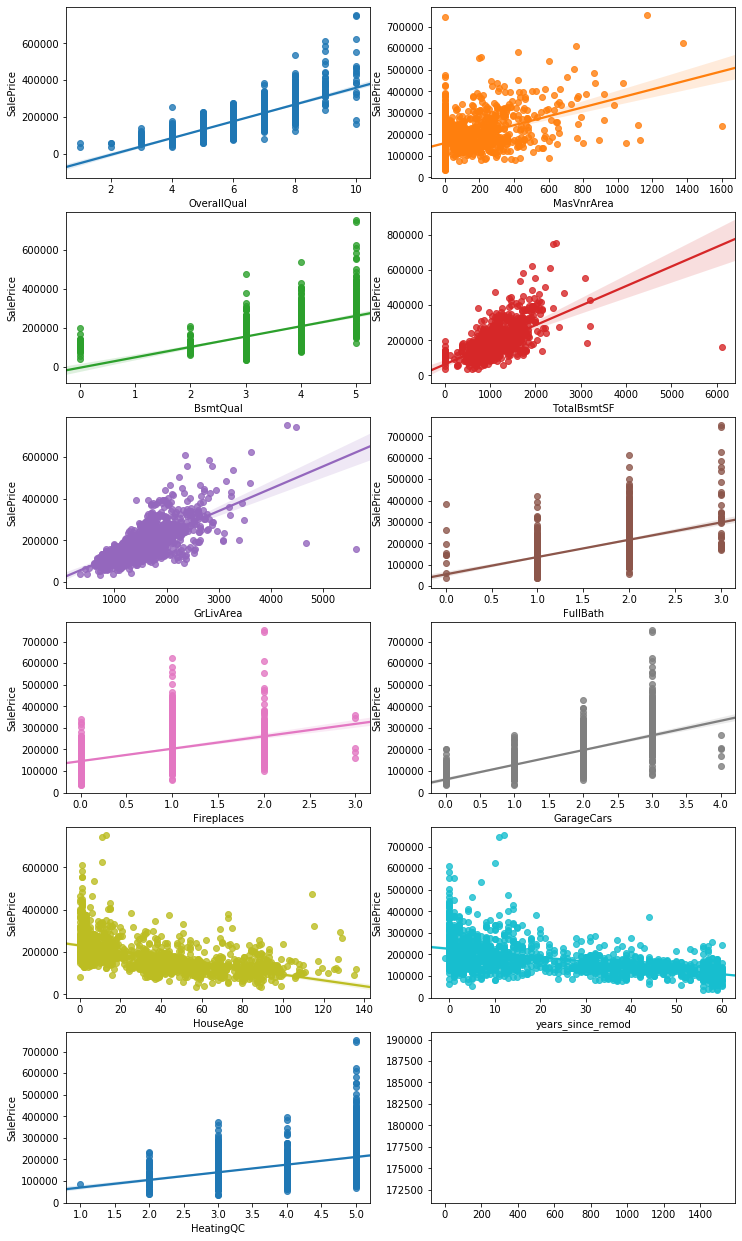

In [956]:
#plotting most correlated features
fig, axes = plt.subplots(6, 2, figsize = (12,22)) 

sns.regplot(data = train_df, x= "OverallQual", y = "SalePrice", ax = axes[0,0])
sns.regplot(data = train_df, x= "MasVnrArea", y= "SalePrice", ax =axes[0,1])
sns.regplot(data = train_df, x= "BsmtQual", y = "SalePrice", ax = axes[1,0])
sns.regplot(data = train_df, x= "TotalBsmtSF", y = "SalePrice", ax = axes[1,1])
sns.regplot(data = train_df, x= "GrLivArea", y = "SalePrice", ax = axes[2,0])
sns.regplot(data = train_df, x= "FullBath", y = "SalePrice", ax = axes[2,1])
sns.regplot(data = train_df, x= "Fireplaces", y = "SalePrice", ax = axes[3,0])
sns.regplot(data = train_df, x= "GarageCars", y = "SalePrice", ax = axes[3,1])

sns.regplot(data = train_df, x= "HouseAge", y = "SalePrice", ax = axes[4,0])
sns.regplot(data = train_df, x= "years_since_remod", y = "SalePrice", ax = axes[4,1])
sns.regplot(data = train_df, x= "HeatingQC", y = "SalePrice", ax = axes[5,0])


In [1040]:
# drop low correlated columns to sale price
train_df = train_df.drop(corrmat.index[abs(corrmat["SalePrice"])<=0.4], axis =1, inplace = False)

# drop high correlated columns
train_df =train_df.drop(high_multicollinear_columns, axis=1, inplace = False)

train_df.shape

(1459, 43)

In [1041]:
# do the same for test

test_df= test_df.drop(corrmat.index[abs(corrmat["SalePrice"])<=0.5], axis =1)
test_df =test_df.drop(high_multicollinear_columns, axis=1, inplace = False)

##  Categorical Variables
It's time to check how the categorical values relate to the target, However, in order to do so, missing values should be addressed first

In [1042]:
# categorical features
categorical_train_columns = train_df.select_dtypes("object").columns
len(categorical_train_columns)


31

delete features that more than 90% data are fall into the same categery

In [1043]:
del_var = []
for var in categorical_train_columns:
    if train_df[var].value_counts().max()/train_df.shape[0] > 0.9 :
        del_var.append(var)

categorical_train_columns = [var for var in categorical_train_columns if var not in del_var]
print(categorical_train_columns)

train_df =train_df.drop(del_var, axis = 1, inplace = False)
train_df.shape

['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition']


(1459, 33)

    MSSubClass  Counts
0           60     299
1           20     536
2           70      60
3           50     144
4          190      30
5           45      12
6           90      52
7          120      87
8           30      69
9           85      20
10          80      57
11         160      63
12          75      16
13         180      10
14          40       4


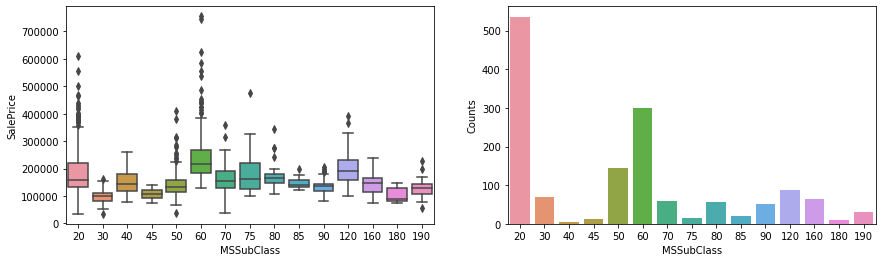

In [756]:
# MSSubClass: Identifies the type of dwelling involved in the sale.
MSSubClass =pd.DataFrame(list(Counter(train_df["MSSubClass"]).items()), columns = ['MSSubClass','Counts'])

print(MSSubClass)
fig, axes = plt.subplots(1, 2, figsize = (6,4)) 
plt.subplots_adjust(right=2)

sns.boxplot(data= train_df, x='MSSubClass', y = "SalePrice", ax=axes[0])
sns.barplot(data=MSSubClass, x="MSSubClass", y="Counts", ax=axes[1])


  MSZoning  Counts
0       RL    1150
1       RM     218
2  C (all)      10
3       FV      65
4       RH      16


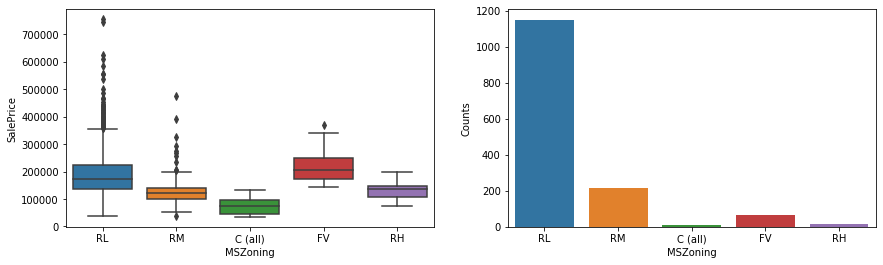

In [757]:
# MSZoning: Identifies the general zoning classification of the sale.

MSZoning =pd.DataFrame(list(Counter(train_df["MSZoning"]).items()), columns = ['MSZoning','Counts'])

print(MSZoning)
fig, axes = plt.subplots(1, 2, figsize = (6,4)) 
plt.subplots_adjust(right=2)

sns.boxplot(data= train_df, x='MSZoning', y = "SalePrice", ax=axes[0])
sns.barplot(data=MSZoning, x="MSZoning", y="Counts", ax=axes[1])

  LotShape  Counts
0      Reg     924
1      IR1     484
2      IR2      41
3      IR3      10
  LandContour  Counts
0         Lvl    1310
1         Bnk      63
2         Low      36
3         HLS      50
  LotConfig  Counts
0    Inside    1051
1       FR2      47
2    Corner     263
3   CulDSac      94
4       FR3       4


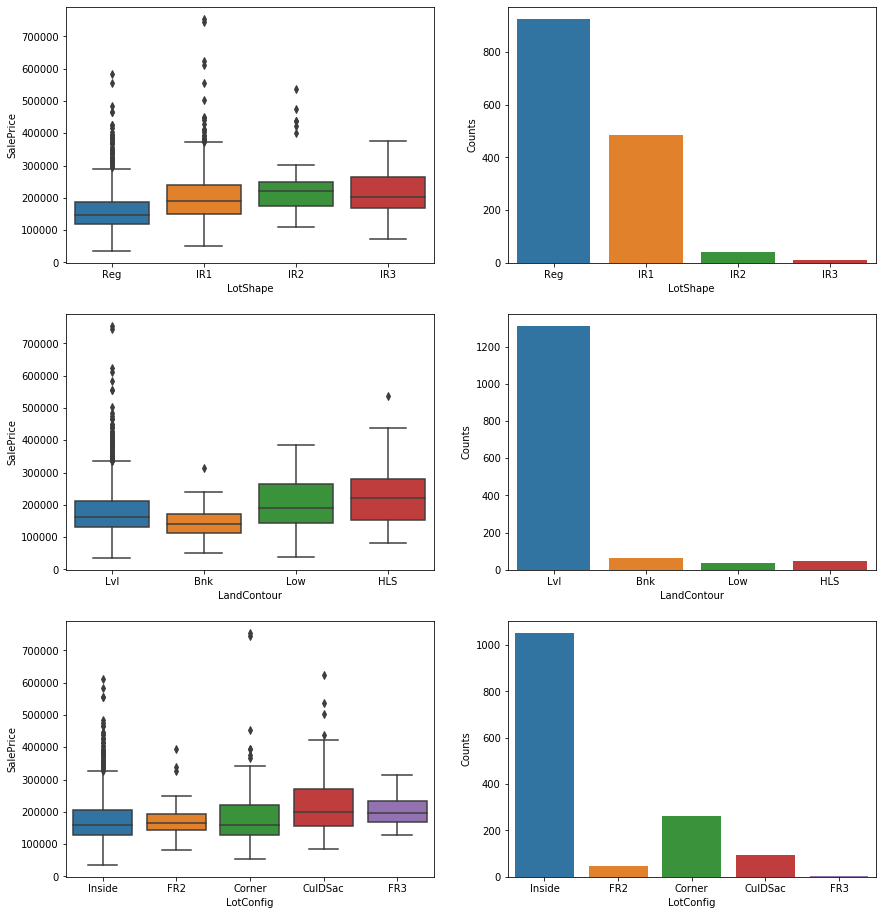

In [1001]:
# LotShape: General shape of property
LotShape =pd.DataFrame(list(Counter(train_df["LotShape"]).items()), columns = ['LotShape','Counts'])
print(LotShape)
# LandContour: Flatness of the property
LandContour =pd.DataFrame(list(Counter(train_df["LandContour"]).items()), columns = ['LandContour','Counts'])
print(LandContour)
# LotConfig: Lot configuration
LotConfig =pd.DataFrame(list(Counter(train_df["LotConfig"]).items()), columns = ['LotConfig','Counts'])
print(LotConfig)

fig, axes = plt.subplots(3, 2, figsize = (6,16)) 
plt.subplots_adjust(right=2)
# LotShape
sns.boxplot(data= train_df, x='LotShape', y = "SalePrice", ax=axes[0,0])
sns.barplot(data=LotShape, x="LotShape", y="Counts", ax=axes[0,1])
# LandContour
sns.boxplot(data= train_df, x='LandContour', y = "SalePrice", ax=axes[1,0])
sns.barplot(data=LandContour, x="LandContour", y="Counts", ax=axes[1,1])
# LotConfig
sns.boxplot(data= train_df, x='LotConfig', y = "SalePrice", ax=axes[2,0])
sns.barplot(data=LotConfig, x="LotConfig", y="Counts", ax=axes[2,1])


   Neighborhood  Counts
0       CollgCr     150
1       Veenker      11
2       Crawfor      51
3       NoRidge      41
4       Mitchel      49
5       Somerst      86
6        NWAmes      73
7       OldTown     113
8       BrkSide      58
9        Sawyer      74
10      NridgHt      77
11        NAmes     225
12      SawyerW      59
13       IDOTRR      37
14      MeadowV      17
15      Edwards     100
16       Timber      37
17      Gilbert      79
18      StoneBr      25
19      ClearCr      28
20      NPkVill       9
21      Blmngtn      17
22       BrDale      16
23        SWISU      25
24      Blueste       2


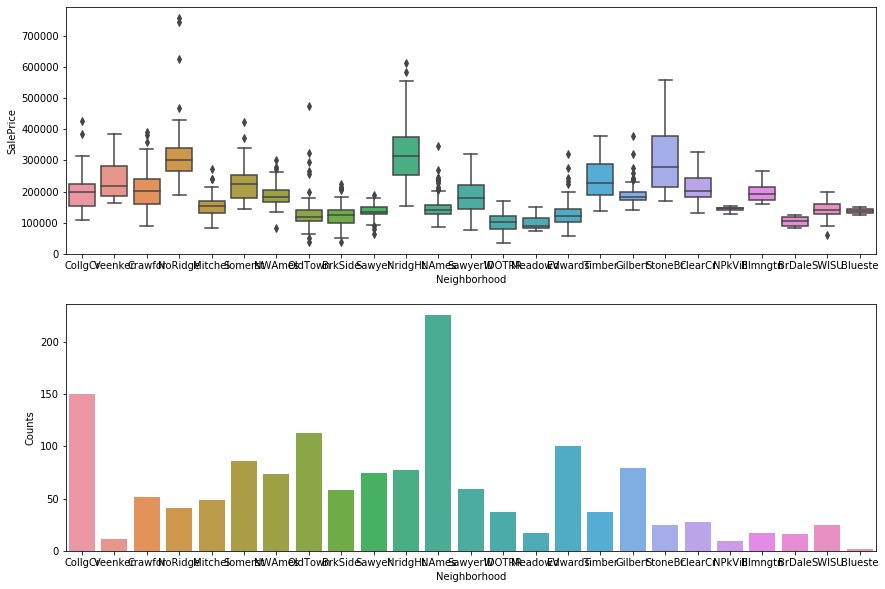

In [769]:
# Neighborhood: Physical locations within Ames city limits
Neighborhood =pd.DataFrame(list(Counter(train_df["Neighborhood"]).items()), columns = ['Neighborhood','Counts'])
print(Neighborhood)

fig, axes = plt.subplots(2, 1, figsize = (6,10)) 
plt.subplots_adjust(right=2)
sns.boxplot(data= train_df, x='Neighborhood', y = "SalePrice", ax=axes[0])
sns.barplot(data=Neighborhood, x="Neighborhood", y="Counts", ax=axes[1])


  Condition1  Counts
0       Norm    1259
1      Feedr      81
2       PosN      19
3     Artery      48
4       RRAe      11
5       RRNn       5
6       RRAn      26
7       PosA       8
8       RRNe       2


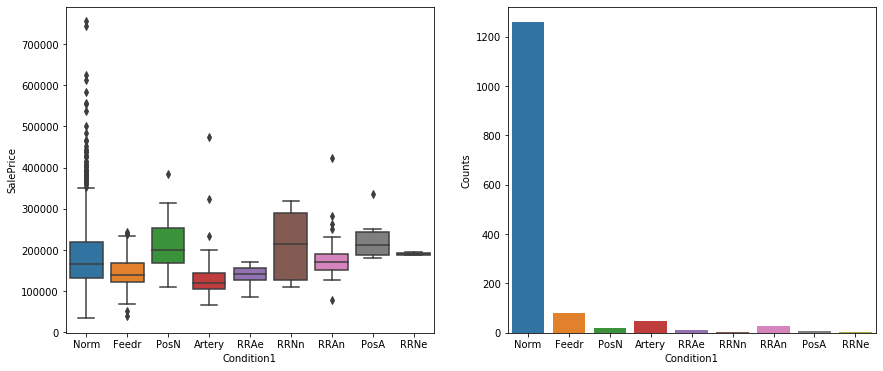

In [1010]:
#  Condition1: Slope of property
Condition1 =pd.DataFrame(list(Counter(train_df["Condition1"]).items()), columns = ['Condition1','Counts'])
print(Condition1)

fig, axes = plt.subplots(1, 2, figsize = (6,6)) 
plt.subplots_adjust(right=2)
# Condition1
sns.boxplot(data= train_df, x='Condition1', y = "SalePrice", ax=axes[0])
sns.barplot(data=Condition1, x="Condition1", y="Counts", ax=axes[1])


  BldgType  Counts
0     1Fam    1219
1   2fmCon      31
2   Duplex      52
3   TwnhsE     114
4    Twnhs      43
  HouseStyle  Counts
0     2Story     445
1     1Story     726
2     1.5Fin     154
3     1.5Unf      14
4     SFoyer      37
5       SLvl      64
6     2.5Unf      11
7     2.5Fin       8


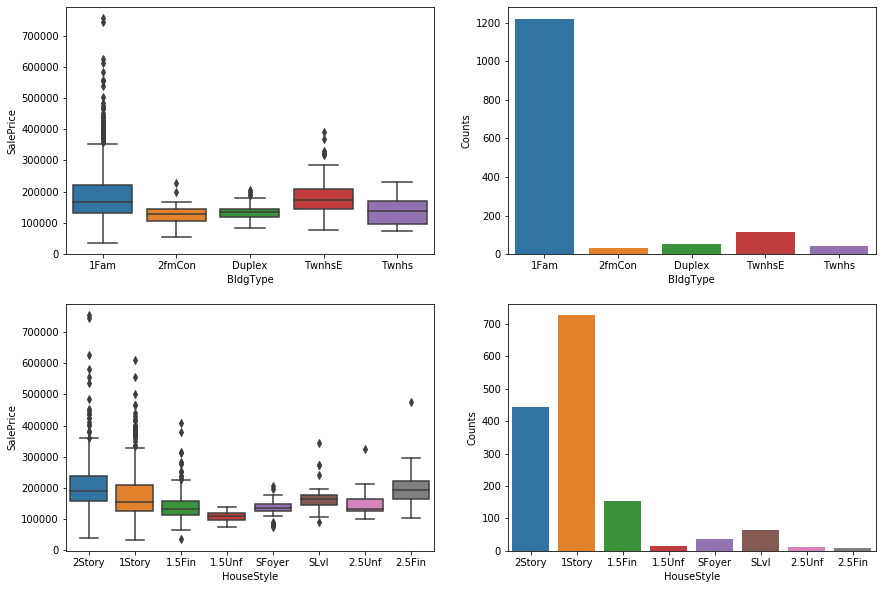

In [761]:
#  BldgType: Type of dwelling
BldgType =pd.DataFrame(list(Counter(train_df["BldgType"]).items()), columns = ['BldgType','Counts'])
print(BldgType)
# HouseStyle: Style of dwelling
HouseStyle =pd.DataFrame(list(Counter(train_df["HouseStyle"]).items()), columns = ['HouseStyle','Counts'])
print(HouseStyle)

fig, axes = plt.subplots(2, 2, figsize = (6,10)) 
plt.subplots_adjust(right=2)
# BldgType
sns.boxplot(data= train_df, x='BldgType', y = "SalePrice", ax=axes[0,0])
sns.barplot(data=BldgType, x="BldgType", y="Counts", ax=axes[0,1])
# HouseStyle
sns.boxplot(data= train_df, x='HouseStyle', y = "SalePrice", ax=axes[1,0])
sns.barplot(data=HouseStyle, x="HouseStyle", y="Counts", ax=axes[1,1])

  RoofStyle  Counts
0     Gable    1140
1       Hip     286
2   Gambrel      11
3   Mansard       7
4      Flat      13
5      Shed       2


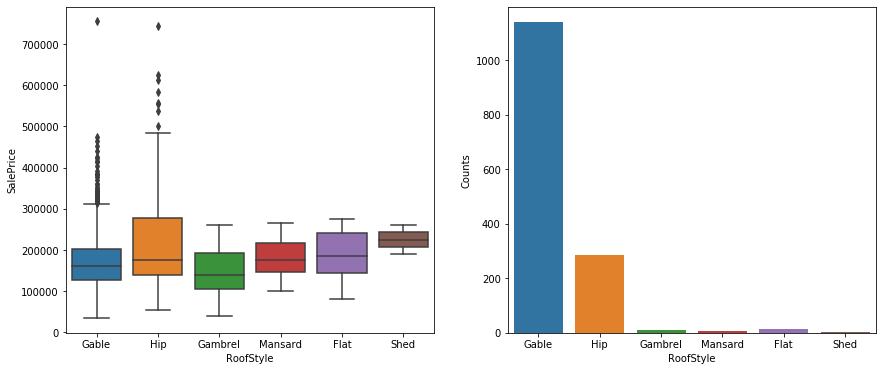

In [1004]:
#  RoofStyle: Type of roof
RoofStyle =pd.DataFrame(list(Counter(train_df["RoofStyle"]).items()), columns = ['RoofStyle','Counts'])
print(RoofStyle)


fig, axes = plt.subplots(1, 2, figsize = (6,6)) 
plt.subplots_adjust(right=2)
# RoofStyle
sns.boxplot(data= train_df, x='RoofStyle', y = "SalePrice", ax=axes[0])
sns.barplot(data=RoofStyle, x="RoofStyle", y="Counts", ax=axes[1])


   Exterior1st  Counts
0      VinylSd     514
1      MetalSd     220
2      Wd Sdng     206
3      HdBoard     222
4      BrkFace      50
5      WdShing      26
6      CemntBd      61
7      Plywood     108
8      AsbShng      20
9       Stucco      25
10     BrkComm       2
11     AsphShn       1
12       Stone       2
13     ImStucc       1
14      CBlock       1
   Exterior2nd  Counts
0      VinylSd     503
1      MetalSd     214
2      Wd Shng      38
3      HdBoard     207
4      Plywood     142
5      Wd Sdng     197
6      CmentBd      60
7      BrkFace      25
8       Stucco      26
9      AsbShng      20
10     Brk Cmn       7
11     ImStucc      10
12     AsphShn       3
13       Stone       5
14       Other       1
15      CBlock       1
  MasVnrType  Counts
0    BrkFace     445
1       None     871
2      Stone     128
3     BrkCmn      15


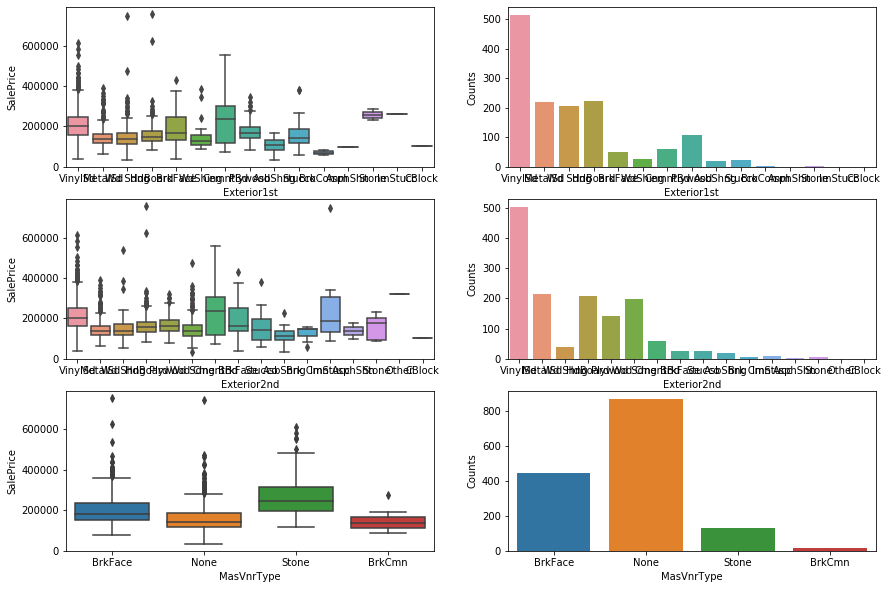

In [763]:
#  Exterior1st: Exterior covering on house
Exterior1st =pd.DataFrame(list(Counter(train_df["Exterior1st"]).items()), columns = ['Exterior1st','Counts'])
print(Exterior1st)
# Exterior2nd: Exterior covering on house (if more than one material)
Exterior2nd =pd.DataFrame(list(Counter(train_df["Exterior2nd"]).items()), columns = ['Exterior2nd','Counts'])
print(Exterior2nd)
# MasVnrType: Masonry veneer type
MasVnrType =pd.DataFrame(list(Counter(train_df["MasVnrType"]).items()), columns = ['MasVnrType','Counts'])
print(MasVnrType)

fig, axes = plt.subplots(3, 2, figsize = (6,10)) 
plt.subplots_adjust(right=2)
# Exterior1st
sns.boxplot(data= train_df, x='Exterior1st', y = "SalePrice", ax=axes[0,0])
sns.barplot(data=Exterior1st, x="Exterior1st", y="Counts", ax=axes[0,1])
# Exterior2nd
sns.boxplot(data= train_df, x='Exterior2nd', y = "SalePrice", ax=axes[1,0])
sns.barplot(data=Exterior2nd, x="Exterior2nd", y="Counts", ax=axes[1,1])
# MasVnrType
sns.boxplot(data= train_df, x='MasVnrType', y = "SalePrice", ax=axes[2,0])
sns.barplot(data=MasVnrType, x="MasVnrType", y="Counts", ax=axes[2,1])

  Foundation  Counts
0      PConc     646
1     CBlock     634
2     BrkTil     146
3       Wood       3
4       Slab      24
5      Stone       6
  BsmtExposure  Counts
0           No     952
1           Gd     134
2           Mn     114
3           Av     221
4         None      38
  BsmtFinType1  Counts
0          GLQ     418
1          ALQ     220
2          Unf     429
3          Rec     133
4          BLQ     148
5         None      37
6          LwQ      74
  BsmtFinType2  Counts
0          Unf    1255
1          BLQ      33
2         None      38
3          ALQ      19
4          Rec      54
5          LwQ      46
6          GLQ      14


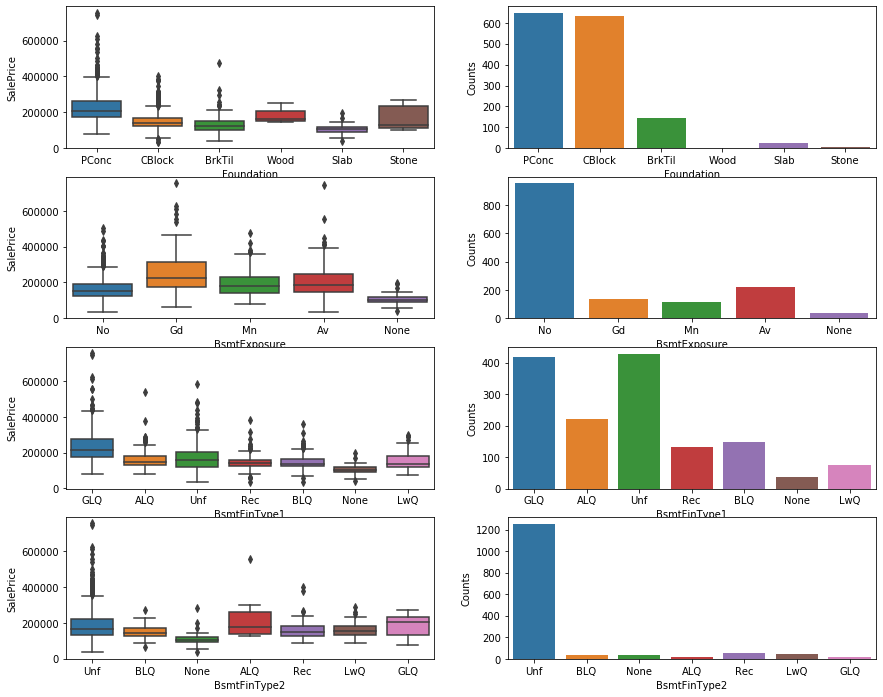

In [1009]:
# Foundation: Type of foundation
# BsmtExposure: Refers to walkout or garden level walls
# BsmtFinType1: Rating of basement finished area
Foundation =pd.DataFrame(list(Counter(train_df["Foundation"]).items()), columns = ['Foundation','Counts'])
print(Foundation)
BsmtExposure =pd.DataFrame(list(Counter(train_df["BsmtExposure"]).items()), columns = ['BsmtExposure','Counts'])
print(BsmtExposure)
BsmtFinType1 =pd.DataFrame(list(Counter(train_df["BsmtFinType1"]).items()), columns = ['BsmtFinType1','Counts'])
print(BsmtFinType1)
BsmtFinType2 =pd.DataFrame(list(Counter(train_df["BsmtFinType2"]).items()), columns = ['BsmtFinType2','Counts'])
print(BsmtFinType2)


fig, axes = plt.subplots(4, 2, figsize = (6,12)) 
plt.subplots_adjust(right=2)
# Foundation
sns.boxplot(data= train_df, x='Foundation', y = "SalePrice", ax=axes[0,0])
sns.barplot(data=Foundation, x="Foundation", y="Counts", ax=axes[0,1])
# BsmtExposure
sns.boxplot(data= train_df, x='BsmtExposure', y = "SalePrice", ax=axes[1,0])
sns.barplot(data=BsmtExposure, x="BsmtExposure", y="Counts", ax=axes[1,1])
# BsmtFinType1
sns.boxplot(data= train_df, x='BsmtFinType1', y = "SalePrice", ax=axes[2,0])
sns.barplot(data=BsmtFinType1, x="BsmtFinType1", y="Counts", ax=axes[2,1])
# BsmtFinType2
sns.boxplot(data= train_df, x='BsmtFinType2', y = "SalePrice", ax=axes[3,0])
sns.barplot(data=BsmtFinType2, x="BsmtFinType2", y="Counts", ax=axes[3,1])


  GarageType  Counts
0     Attchd     870
1     Detchd     387
2    BuiltIn      87
3    CarPort       9
4       None      81
5    Basment      19
6     2Types       6
  GarageFinish  Counts
0          RFn     422
1          Unf     605
2          Fin     351
3         None      81


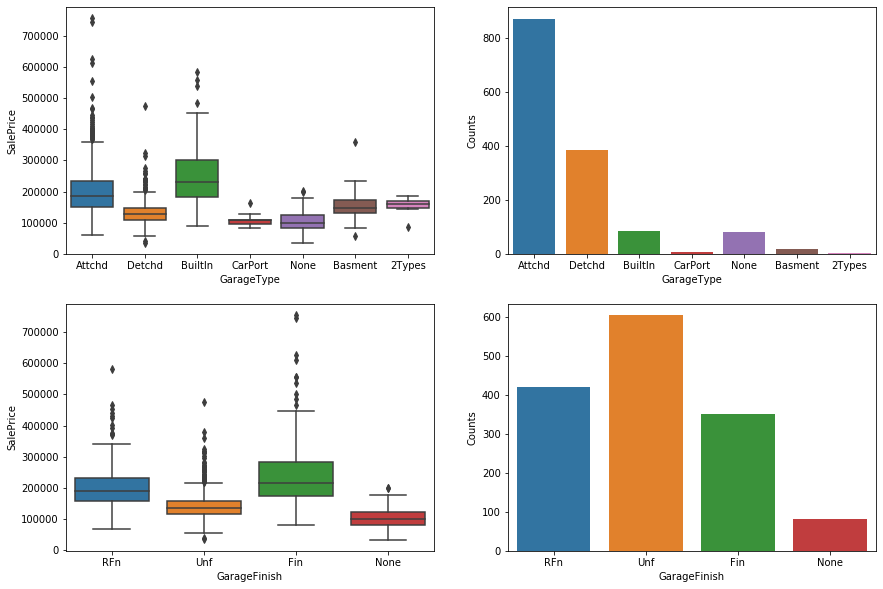

In [767]:
# GarageType: Garage location
GarageType =pd.DataFrame(list(Counter(train_df["GarageType"]).items()), columns = ['GarageType','Counts'])
print(GarageType)
# GarageFinish: Interior finish of the garage
GarageFinish =pd.DataFrame(list(Counter(train_df["GarageFinish"]).items()), columns = ['GarageFinish','Counts'])
print(GarageFinish)

fig, axes = plt.subplots(2, 2, figsize = (6,10)) 
plt.subplots_adjust(right=2)
# GarageType
sns.boxplot(data= train_df, x='GarageType', y = "SalePrice", ax=axes[0,0])
sns.barplot(data=GarageType, x="GarageType", y="Counts", ax=axes[0,1])
# GarageFinish
sns.boxplot(data= train_df, x='GarageFinish', y = "SalePrice", ax=axes[1,0])
sns.barplot(data=GarageFinish, x="GarageFinish", y="Counts", ax=axes[1,1])

  SaleType  Counts
0       WD    1266
1      New     122
2      COD      43
3    ConLD       9
4    ConLI       5
5      CWD       4
6    ConLw       5
7      Con       2
8      Oth       3
  SaleCondition  Counts
0        Normal    1197
1       Abnorml     101
2       Partial     125
3       AdjLand       4
4        Alloca      12
5        Family      20


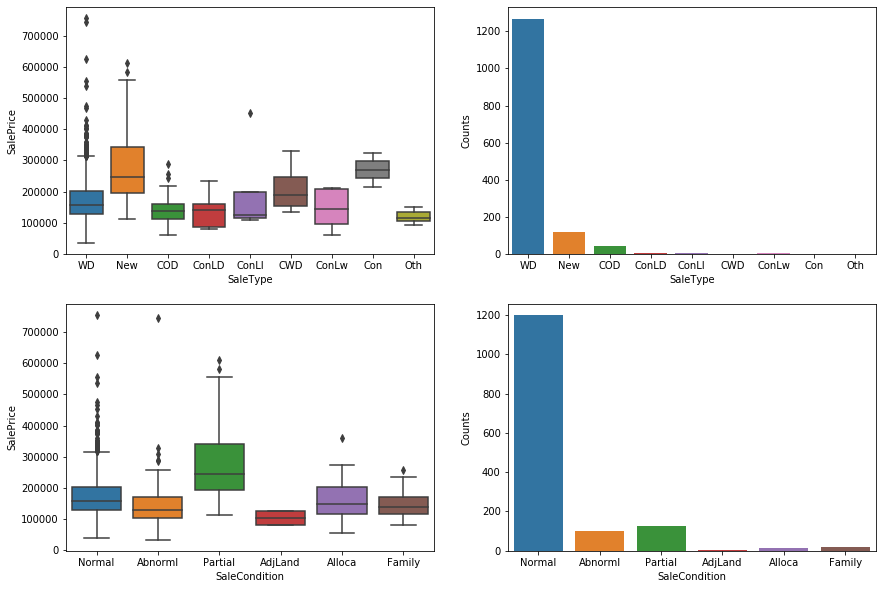

In [768]:
# SaleType: Type of sale
SaleType =pd.DataFrame(list(Counter(train_df["SaleType"]).items()), columns = ['SaleType','Counts'])
print(SaleType)
# SaleCondition: Condition of sale
SaleCondition =pd.DataFrame(list(Counter(train_df["SaleCondition"]).items()), columns = ['SaleCondition','Counts'])
print(SaleCondition)

fig, axes = plt.subplots(2, 2, figsize = (6,10)) 
plt.subplots_adjust(right=2)
sns.boxplot(data= train_df, x='SaleType', y = "SalePrice", ax=axes[0,0])
sns.barplot(data=SaleType, x="SaleType", y="Counts", ax=axes[0,1])
sns.boxplot(data= train_df, x='SaleCondition', y = "SalePrice", ax=axes[1,0])
sns.barplot(data=SaleCondition, x="SaleCondition", y="Counts", ax=axes[1,1])

In [1000]:
print(categorical_train_columns)

['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition']


In [1044]:
# categorical features transformation
def categorical_feature_transformation(df):
   # df[i] = df[i].map({"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})
    # merge RH into RM for MS
    df["MSZoning"] = df["MSZoning"].apply(lambda x: "RM" if x =="RH" else x)
    
    # regroup LotShape to regular and irregular
    df["LotShape"] = df["LotShape"].map({"Reg":"Reg", "IR1":"IR", "IR2":"IR", "IR3":"IR"})
    # regroup LandContour to flat and non-flat
    df["LandContour"] = df["LandContour"].map({"Lvl":"flat", "Bnk":"non-flat", "HLS":"non-flat", "Low":"non-flat"})
    # merge FR2 and FR3 into FR for LotConfig
    df["LotConfig"] = df["LotConfig"].apply(lambda x: "FR" if (x =="FR2" or x =="FR3") else x)
    # regroup Condition 
    df["Condition1"] = df["Condition1"].map({"Artery":"Artery","Feedr":"Feedr","Norm":"Norm","RRNn":"RR", "RRAn":"RR", 
                                             "RRNe":"RR","RRAe":"RR", "PosN":"Pos", "PosA":"Pos"})
    df["BsmtExposure"] = df["BsmtExposure"].map({"None":"0","No":"1","Mn":"2","Av":"2", "Gd":"2"})

    return df



In [1045]:
train_df = categorical_feature_transformation(train_df)
test_df = categorical_feature_transformation(test_df)



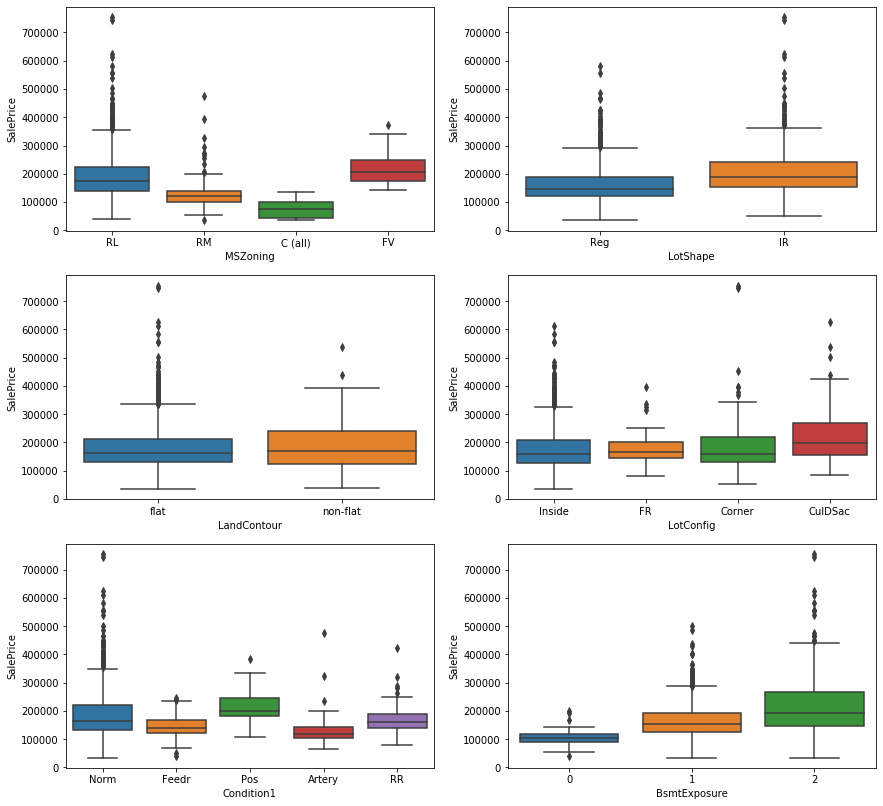

In [1046]:

fig, axes = plt.subplots(3, 2, figsize = (6,14)) 
plt.subplots_adjust(right=2)
sns.boxplot(data= train_df, x='MSZoning', y = "SalePrice", ax=axes[0,0])
sns.boxplot(data= train_df, x='LotShape', y = "SalePrice", ax=axes[0,1])
sns.boxplot(data= train_df, x='LandContour', y = "SalePrice", ax=axes[1,0])
sns.boxplot(data= train_df, x='LotConfig', y = "SalePrice", ax=axes[1,1])
sns.boxplot(data= train_df, x='Condition1', y = "SalePrice", ax=axes[2,0])
sns.boxplot(data= train_df, x='BsmtExposure', y = "SalePrice", ax=axes[2,1])




## 5. Preprocessing

It is time to do the last arrangements before modelling.
Firs, as mentioned, I will log tranform the target variable

In [1107]:
#print(train_df.columns)
#categorical_columns = train_df.select_dtypes("object").columns
#print(categorical_columns)

train_df.select_dtypes(["object"])
#train_df.shape
quantities_columns = ["TotalBsmtSF","GrLivArea","SalePrice","HouseAge","years_since_remod","MasVnrArea"]



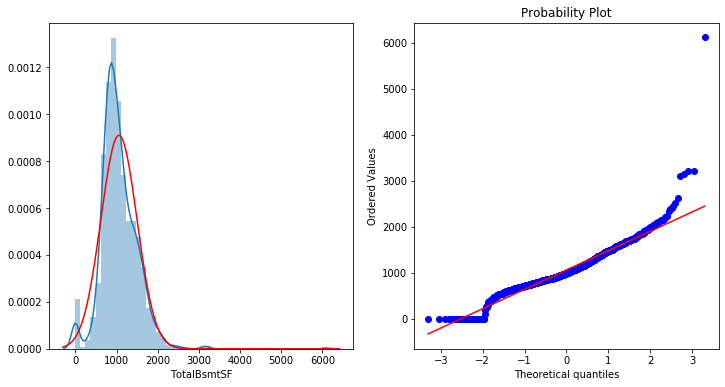

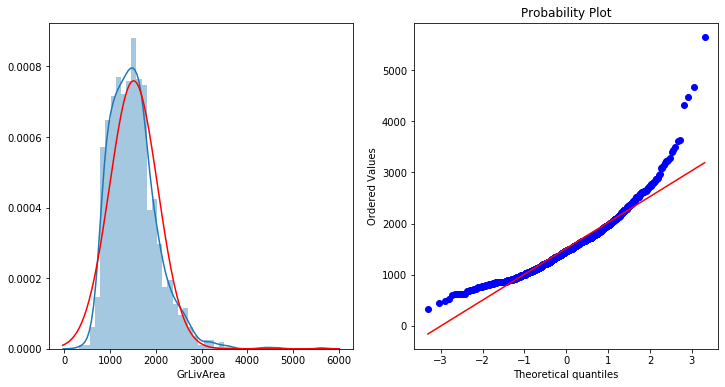

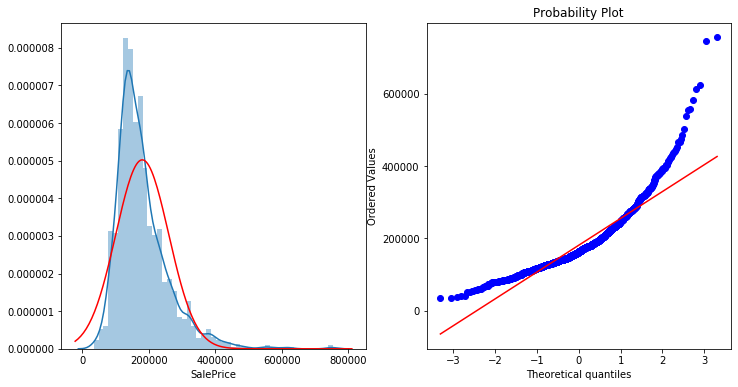

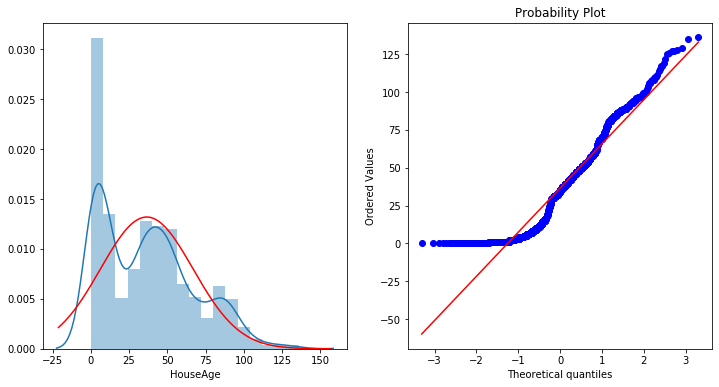

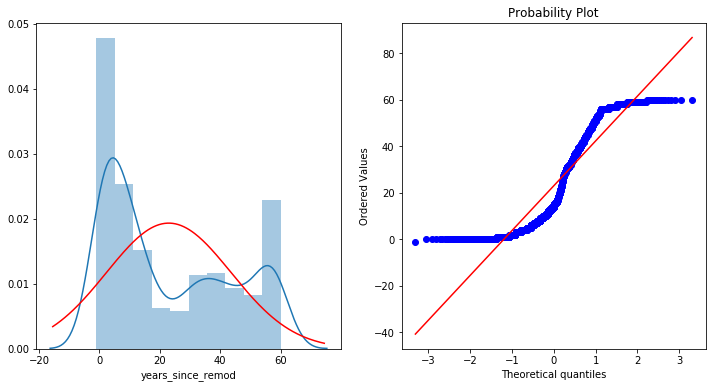

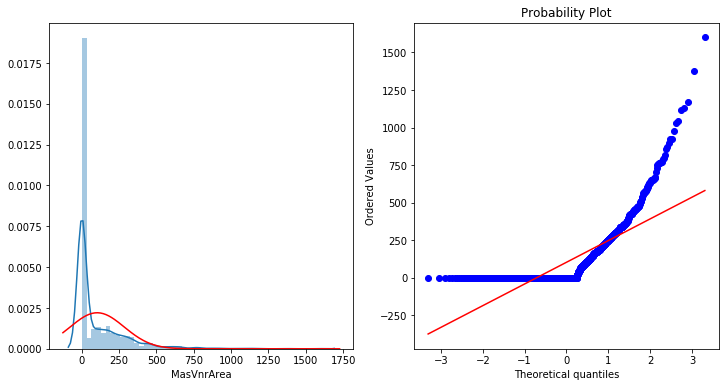

In [1108]:
for column in quantities_columns:
    fig, axes = plt.subplots(1, 2, figsize = (12,6)) 
    sns.distplot(train_df[column], kde=True, fit=norm, fit_kws={"color":"red"}, ax=axes[0])
    probplot(train_df[column], plot=plt)
    

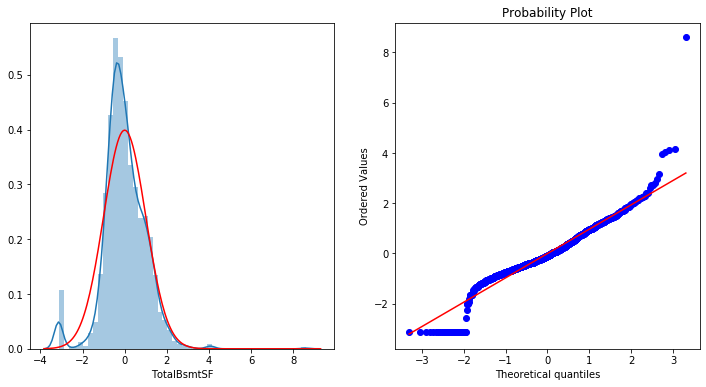

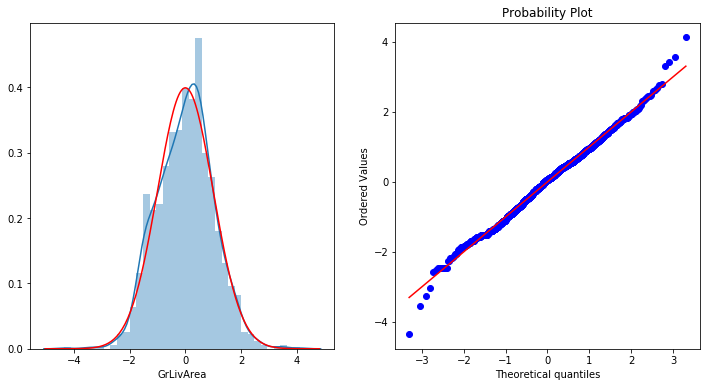

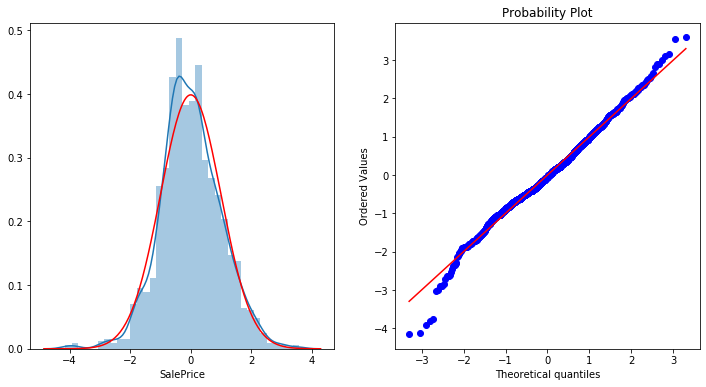

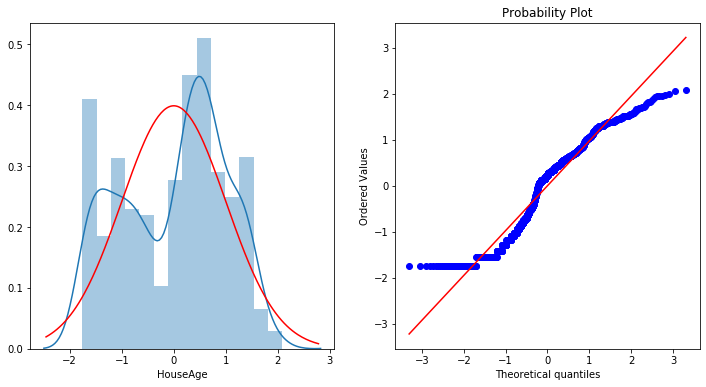

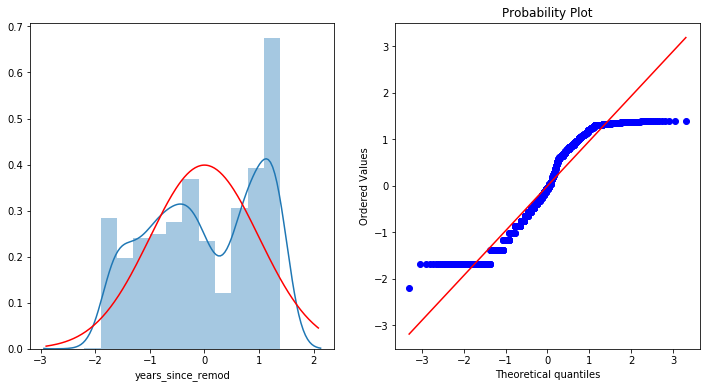

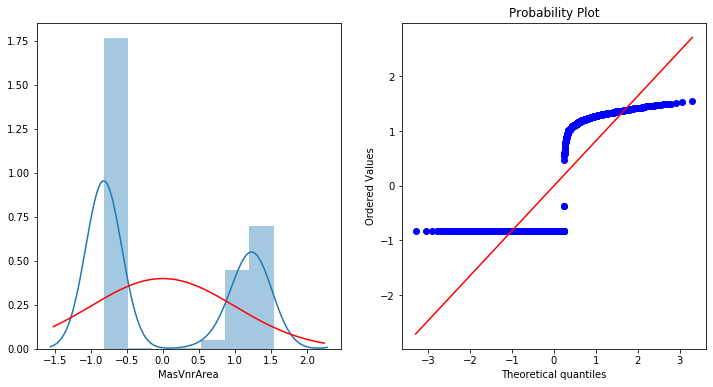

In [1116]:
data = train_df[quantities_columns]
# perform a yeo-johnson transform of the dataset
pt = PowerTransformer(method='yeo-johnson')
data = pt.fit_transform(data)

dataset = pd.DataFrame(data, columns=quantities_columns)

#fig, axes = plt.subplots(1, 2, figsize = (12,6)) 
#sns.distplot(dataset["GrLivArea"], kde = True, fit=norm, ax=axes[0])
#probplot(dataset["GrLivArea"], plot=plt)


for column in quantities_columns:
    fig, axes = plt.subplots(1, 2, figsize = (12,6)) 
    sns.distplot(dataset[column], kde=True, fit=norm, fit_kws={"color":"red"}, ax=axes[0])
    probplot(dataset[column], plot=plt)

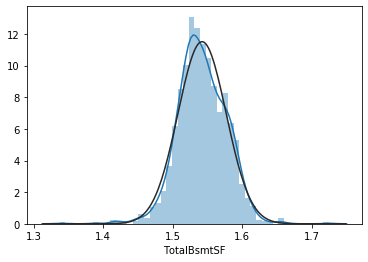

In [1137]:

new["HasBsmt"] = pd.Series(len(train_df['TotalBsmtSF']), index = train_df.index)

new['HasBsmt'] = 0 

new.loc[new['TotalBsmtSF']>0,'HasBsmt'] = 1
#new['HasBsmt']
#pd.DataFrame(list(Counter(new['HasBsmt']).items()), columns = ['SaleType','Counts'])
new.loc[new['HasBsmt']==1,'TotalBsmtSF'] = np.sqrt(new['TotalBsmtSF'])
new['TotalBsmtSF']
sns.distplot(new[new['HasBsmt']>0]['TotalBsmtSF'], fit=norm);
#fig = plt.figure()
#res = probplot(df[df['HasBsmt']>0]['TotalBsmtSF'], plot=plt)

In [1121]:
help(pd.Series)

Help on class Series in module pandas.core.series:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scalar value
 |      Contains data stored in Series.
 |  
 |      .. versionchanged ::

In [907]:

Y =train_df["SalePrice"].reshape(len(train_df["SalePrice"]),1)
#yj = PowerTransformer(method='yeo-johnson')
#yj.fit(train_df["SalePrice"]

#Y_trans = power.fit_transform(Y)
#Y = yj.transform(train_df["SalePrice"].to_frame())
#print()


#sns.distplot(Y, kde=True, fit=norm)
#sns.distplot(np.log1p(df['GrLivArea']), kde = True, fit=norm);
#res = probplot(np.log(df['GrLivArea']), plot=plt)


np.reshape(len(train_df["SalePrice"]),1)


AttributeError: 'Series' object has no attribute 'reshape'

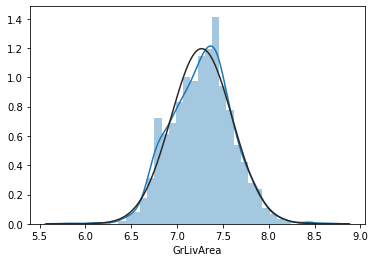

In [855]:
sns.distplot(np.log(df['GrLivArea']), kde = True, fit=norm);

In [839]:
help(pd.to_frame())

AttributeError: module 'pandas' has no attribute 'to_frame'

Convert quality columns from object to numeric

In [68]:
train_data["ExterCond"]

0       3
1       3
2       3
3       3
4       3
       ..
1455    3
1456    3
1457    4
1458    3
1459    3
Name: ExterCond, Length: 1444, dtype: int64

In [39]:
#log transformation
Y_train=np.log(train_data['SalePrice'])


transform the categorical variables into dummies; 

In [40]:
# Split features and labels
#train_labels = train_data['SalePrice'].reset_index(drop=True)
train_features = train_data.drop('SalePrice', axis=1)
#test_features = test_data.drop('SalePrice', axis=1)

# Combine train and test features in order to apply the feature transformation to the entire dataset
#all_features = pd.concat([train_features, test_features]).reset_index(drop=True)


In [45]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 22 columns):
MSZoning         1451 non-null object
Neighborhood     1451 non-null object
Condition2       1451 non-null object
OverallQual      1451 non-null int64
YearBuilt        1451 non-null int64
YearRemodAdd     1451 non-null int64
RoofMatl         1451 non-null object
MasVnrType       1451 non-null object
ExterQual        1451 non-null object
BsmtQual         1451 non-null object
CentralAir       1451 non-null object
Electrical       1451 non-null object
1stFlrSF         1451 non-null int64
GrLivArea        1451 non-null int64
FullBath         1451 non-null int64
KitchenQual      1451 non-null object
FireplaceQu      1451 non-null object
GarageFinish     1451 non-null object
GarageCars       1451 non-null int64
PoolQC           1451 non-null object
SaleType         1451 non-null object
SaleCondition    1451 non-null object
dtypes: int64(7), object(15)
memory usage: 300.7+ KB


In [46]:
factors = train_features.select_dtypes("object")
print(factors.shape)
factor_dummies = pd.get_dummies(factors)
quantitive = train_features.select_dtypes(["int64","float64"])
print(quantitive.shape)
X = pd.concat([quantitive,factor_dummies], axis = 1)
X.head()

(1451, 15)
(1451, 7)


,OverallQual,YearBuilt,YearRemodAdd,1stFlrSF,GrLivArea,FullBath,GarageCars,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,7,2003,2003,856,1710,2,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,6,1976,1976,1262,1262,2,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,7,2001,2002,920,1786,2,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,7,1915,1970,961,1717,1,3,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,8,2000,2000,1145,2198,2,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0


# 5. Modelling

Now that evrything is set, I will try different regression algorithms:

* Linear Regression
* Ridge Regression
* Lasso Regression
* Decision Tree Regression
* Random Forest Regression
* XGBoost Regression

Five crossvalidation folders will be used. 

In [ ]:
eg = LinearRegression()
>>> reg.fit ([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
LinearRegression()
>>> reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
LinearRegression()
>>> reg.coef_
array([0.5, 0.5])

In [36]:
score_calc = 'neg_mean_squared_error'

In [37]:
#Linear Regression
LR = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_search= GridSearchCV(LR, parameters, cv=5, verbose=1 , scoring = score_calc)
grid_search.fit(X_train, Y_train)

LR_score=grid_search.best_score_
LR_params=grid_search.best_params_
print(LR_score)
print(LR_params)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-0.024821620502910306
{'copy_X': True, 'fit_intercept': True, 'normalize': False}


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.5s finished


In [38]:
#Ridge Regression
RR = Ridge()
parameters = {'alpha':[0.001,0.005,0.01,0.1,0.5,1], 'normalize':[True,False], 'tol':[1e-06,5e-06,1e-05,5e-05]}
grid_search= GridSearchCV(RR, parameters, cv=5, verbose=1 , scoring = score_calc, n_jobs = -1)
grid_search.fit(X_train, Y_train)

RR_score=grid_search.best_score_
RR_params=grid_search.best_params_
print(RR_score)
print(RR_params)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.6s


-0.023839047569962045
{'alpha': 1, 'normalize': False, 'tol': 1e-06}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    3.4s finished


In [39]:
#Lasso Regression
LaR = Lasso()
parameters = {'alpha':[1e-03,0.01,0.1,0.5,0.8,1], 'normalize':[True,False], 'tol':[1e-06,1e-05,5e-05,1e-04,5e-04,1e-03]}
grid_search= GridSearchCV(LaR, parameters, cv=5, verbose=1 , scoring = score_calc, n_jobs = -1)
grid_search.fit(X_train, Y_train)

LaR_score=grid_search.best_score_
LaR_params=grid_search.best_params_
print(LaR_score)
print(LaR_params)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.0s


-0.024551096273114727
{'alpha': 0.001, 'normalize': False, 'tol': 1e-06}


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    1.7s finished


In [40]:
#DecisionTree Regression
DTR = DecisionTreeRegressor()
parameters = { 'max_depth' : [7,8,9,10] , 'max_features' : [11,12,13,14] ,
               'max_leaf_nodes' : [None, 12,15,18,20] ,'min_samples_split' : [20,25,30],
                'presort': [False,True] }
grid_search= GridSearchCV(DTR, parameters, cv=5, verbose=1 , scoring = score_calc, n_jobs = -1)
grid_search.fit(X_train, Y_train)

DTR_score=grid_search.best_score_
DTR_params=grid_search.best_params_
print(DTR_score)
print(DTR_params)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.4s


-0.03934172526717449
{'max_depth': 7, 'max_features': 14, 'max_leaf_nodes': None, 'min_samples_split': 20, 'presort': False}


[Parallel(n_jobs=-1)]: Done 2380 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:   10.4s finished
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


In [41]:
#RandomForest Regression
RFR=RandomForestRegressor()
parameters = {'min_samples_split' : [3,4,6,10], 'n_estimators' : [70,100] }
grid_search= GridSearchCV(RFR, parameters, cv=5, verbose=1 , scoring = score_calc, n_jobs = -1)
grid_search.fit(X_train, Y_train)

RFR_score=grid_search.best_score_
RFR_params=grid_search.best_params_
print(RFR_score)
print(RFR_params)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   11.1s finished


-0.022610781206606343
{'min_samples_split': 3, 'n_estimators': 70}


In [42]:
#XGBoost Regression
XGB=XGBRegressor()
parameters = {'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
grid_search= GridSearchCV(XGB, parameters, cv=5, verbose=1 , scoring = score_calc, n_jobs = -1)
grid_search.fit(X_train, Y_train)

XGB_score=grid_search.best_score_
XGB_params=grid_search.best_params_
print(XGB_score)
print(XGB_params)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  2.0min finished


[17:02:16] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[17:02:16] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:02:17] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
-0.019305770482755134
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


Let's compare the models with each other

In [43]:
list_scores = [LR_score, RR_score, LaR_score, DTR_score,
               RFR_score, XGB_score]
list_regressors = ['Linear','Ridge','Lasso','DT','RF','XGB']

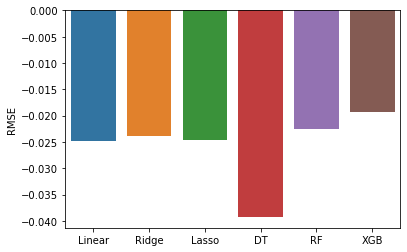

In [44]:
fig, ax = plt.subplots()
sns.barplot(x=list_regressors, y=list_scores, ax=ax)
plt.ylabel('RMSE')
plt.show()

XGBoost is the one that performs better and for this reason i will use it to make the predictions.

In [45]:
XGB_tuned=XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.03, max_depth=5, 
                  min_child_weight= 4, n_estimators=500, nthread=4, objective= 'reg:linear',
                  silent=1, subsample=0.7)

XGB_tuned.fit(X_train,Y_train)

[17:02:19] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[17:02:19] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:02:20] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, max_delta_step=0, max_depth=5,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, nthread=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, silent=1, subsample=0.7, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [46]:
Y_hat = XGB_tuned.predict(X_test).astype(float)
Y_hat

array([11.67997646, 11.93177032, 12.05281162, ..., 11.93165779,
       11.61259937, 12.31444931])

Text(0.5, 0, 'Xgboost Feature Importance')

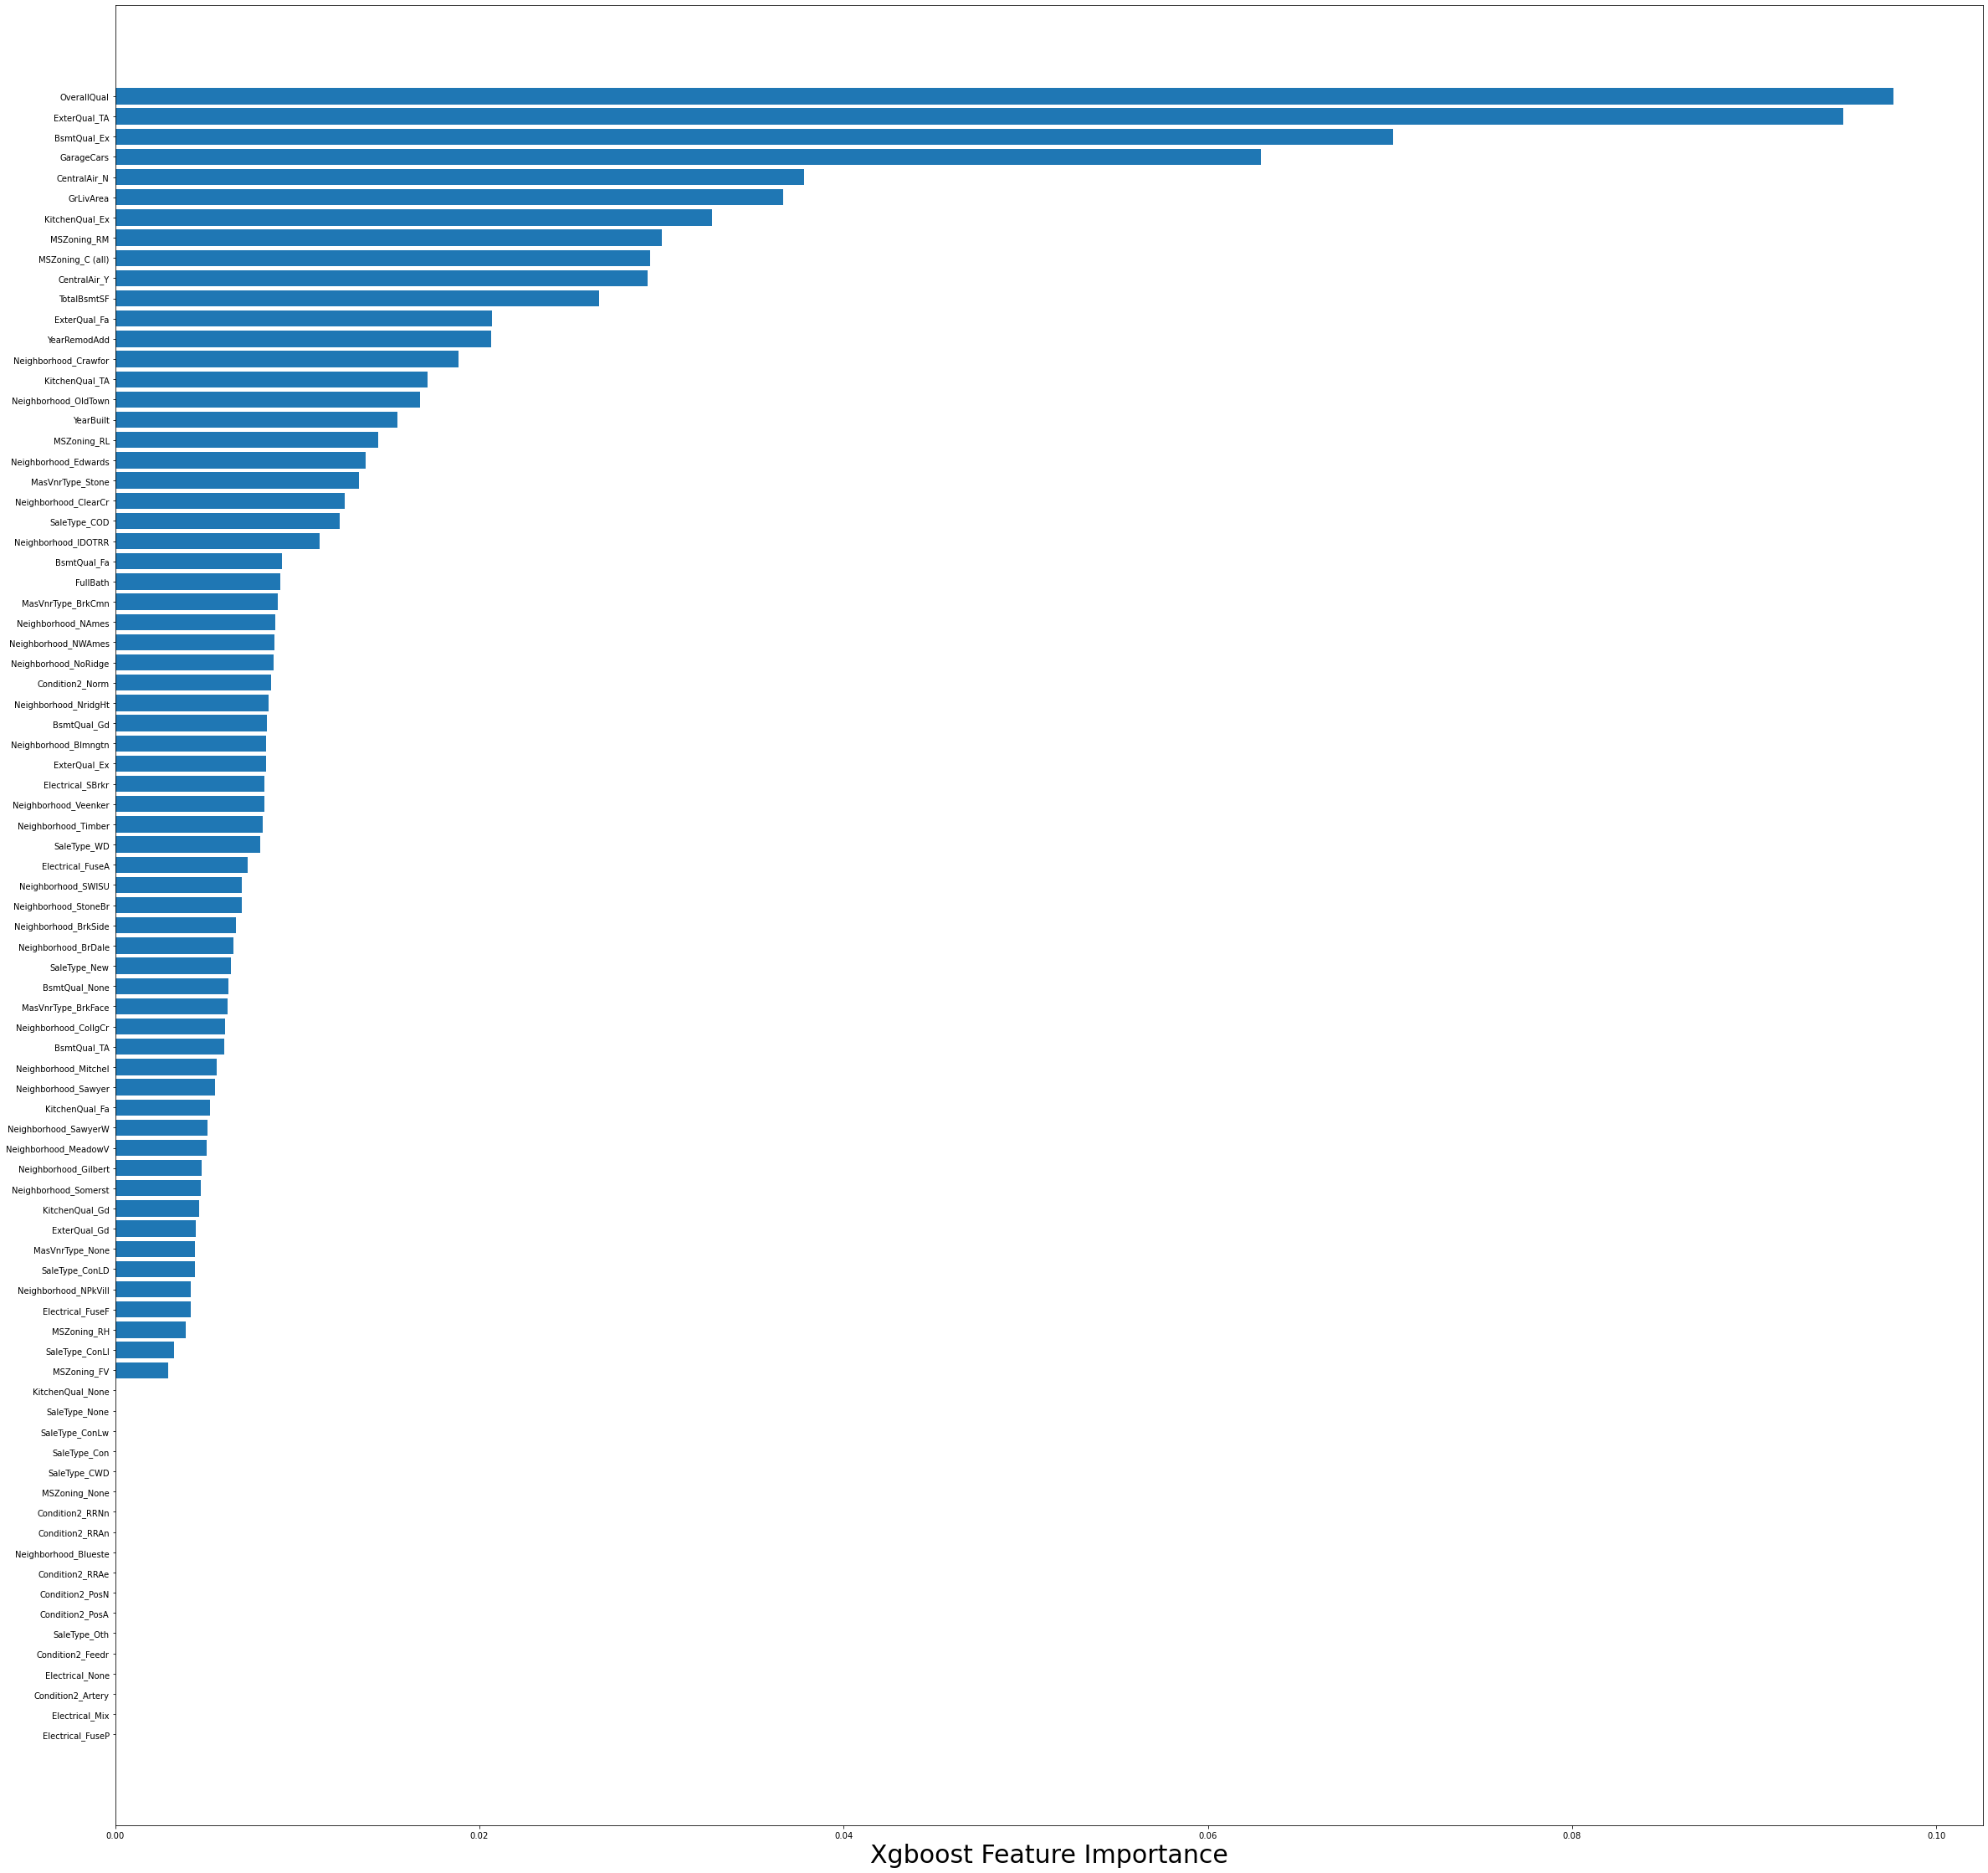

In [47]:
sorted_idx = XGB_tuned.feature_importances_.argsort()
plt.figure(figsize=(40,40))
#plt.rcParams['font.size'] = '30'
plt.barh(X_train.columns[sorted_idx], XGB_tuned.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance",fontsize=30)

In [48]:
XGB_submission = {'Id': test_data.Id, 'SalePrice': np.exp(Y_hat)}
submission_XGB = pd.DataFrame(data=XGB_submission )
submission_XGB.to_csv('submission_XGB.csv', index=False)